In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rcParams

rcParams['figure.dpi']=150

## Medidas eléctricas-Comprobacion de proporcionalidad entre intensidad y voltaje:

In [152]:
#cargamos dos tomas de datos de voltaje e intensidad:

datos_V_I_1 = np.loadtxt('datos_V_I_1.txt', comments='%')
datos_V_I_2 = np.loadtxt('datos_V_I_2.txt', comments='%')
#Primera toma:
voltaje_1 = datos_V_I_1[:,0]
intensidad_1 = datos_V_I_1[:,1]

#Segunda toma:
voltaje_2 = datos_V_I_2[:,0]
intensidad_2 = datos_V_I_2[:,1]

In [153]:
# Veamos la proporcionalidad de la ley de ohm para ver como se comportan
#nuestros datos:

## Primera toma:

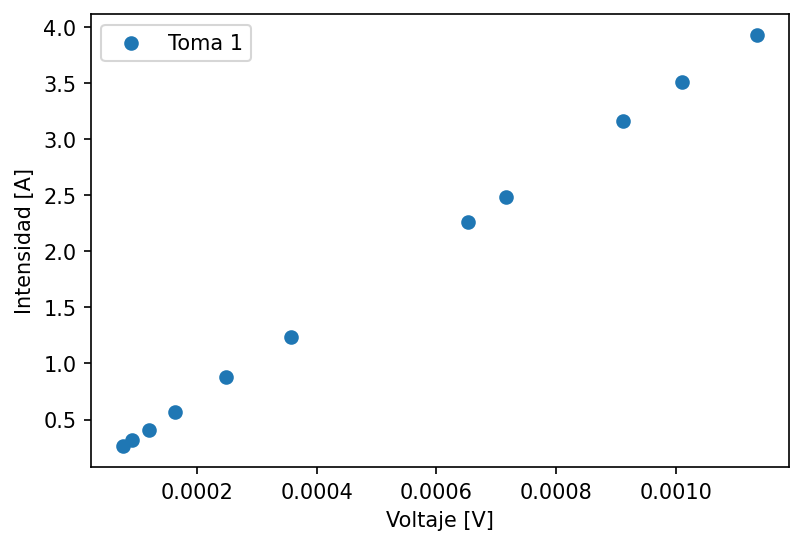

In [154]:
plt.scatter(voltaje_1, intensidad_1, label='Toma 1')

plt.ylabel('Intensidad [A]')
plt.xlabel('Voltaje [V]')
plt.legend()

plt.show()

In [155]:
# Vamos a realizar un ajuste lineal para determinar la pendiente (1/R) y 
# comprobar con el calculo directo a partir de la media de los datos 
# 1/R_media=(I/V)_media

In [156]:
def ohm(x,a):
    return a*x

In [157]:
popt, pcov = curve_fit(ohm, voltaje_1, intensidad_1)
perr = np.sqrt(np.diag(pcov))

In [158]:
print(popt)
print(perr)

[3466.68237517]
[3.53912707]


In [159]:
pendiente_1 = popt
s_pendiente_1 = perr
print(pendiente_1)
print(s_pendiente_1)

[3466.68237517]
[3.53912707]


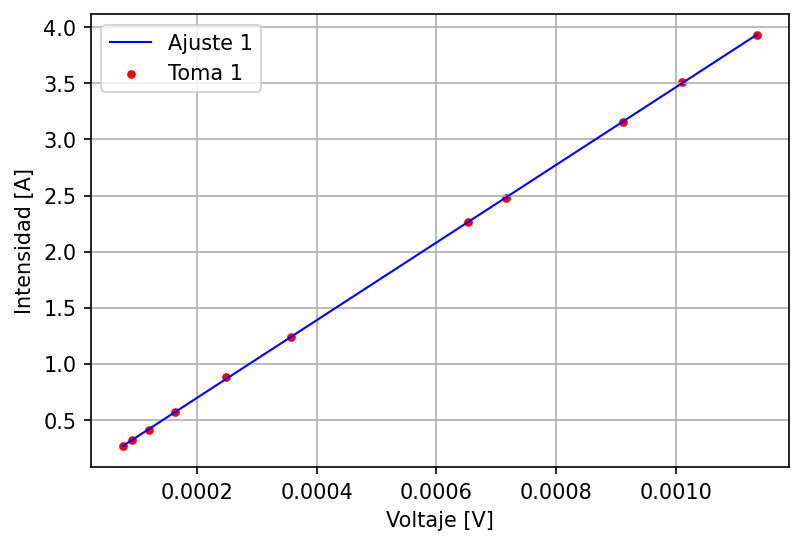

In [160]:
plt.scatter(voltaje_1, intensidad_1,s=10, c='r', label='Toma 1')

plt.plot(voltaje_1, ohm(voltaje_1, *popt), c='b', linewidth= 1, label='Ajuste 1')

plt.ylabel('Intensidad [A]')
plt.xlabel('Voltaje [V]')
plt.legend()
plt.grid()
plt.show()

In [161]:
# Calculemos ahora el cociente I/V
def cociente(y,x):
    return y/x

In [162]:
inv_resistencia_1 = cociente(intensidad_1,voltaje_1)

In [163]:
media_inv_res_1 = np.mean(inv_resistencia_1)
s_media_inv_res_1 = np.std(inv_resistencia_1)
print(media_inv_res_1)
print(s_media_inv_res_1)

3466.3391837860545
33.3054370470523


### Obtenemos por tanto de la primera toma de datos:

---> Del ajuste:

<center> $(\frac{1}{R})_{ajuste1}=3466.68(3.54)[\Omega^-1]$

---> De la media:
    
<center> $(\frac{1}{R})_{media1}=3466.34(33.30)[\Omega^-1]$

## Segunda toma:

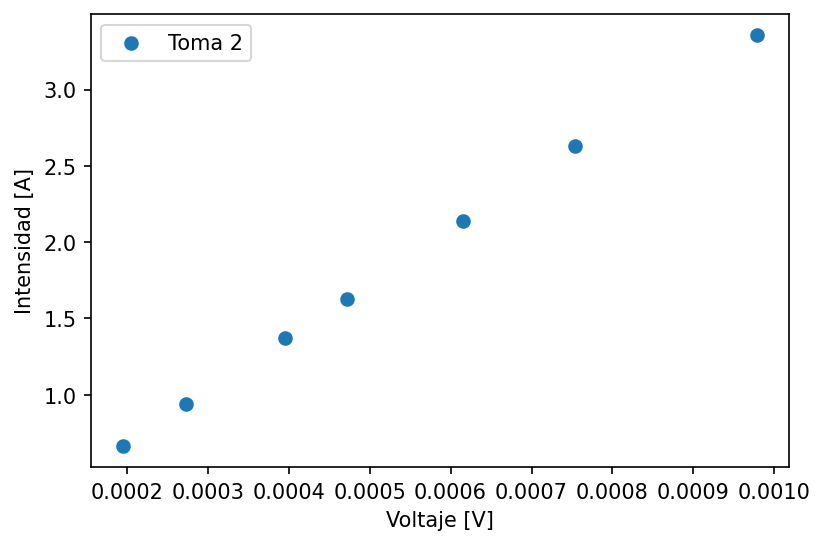

In [164]:
plt.scatter(voltaje_2, intensidad_2, label='Toma 2')

plt.ylabel('Intensidad [A]')
plt.xlabel('Voltaje [V]')
plt.legend()

plt.show()

In [165]:
# Vamos a realizar un ajuste lineal para determinar la pendiente (1/R) y 
# comprobar con el calculo directo a partir de la media de los datos 
# 1/R_media=(I/V)_media

In [166]:
popt, pcov = curve_fit(ohm, voltaje_2, intensidad_2)
perr = np.sqrt(np.diag(pcov))

In [167]:
pendiente_2 = popt
s_pendiente_2 = perr
print(pendiente_2)
print(s_pendiente_2)

[3458.79009462]
[10.44396538]


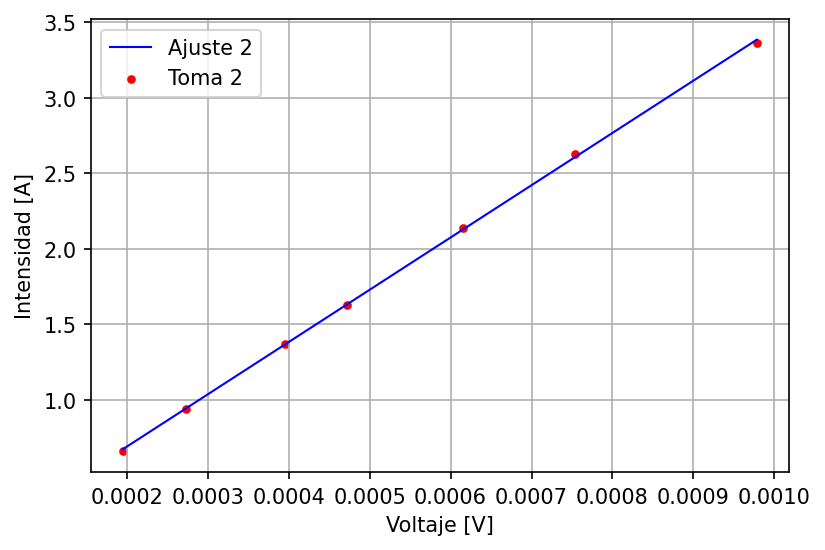

In [168]:
plt.scatter(voltaje_2, intensidad_2,s=10, c='r', label='Toma 2')

plt.plot(voltaje_2, ohm(voltaje_2, *popt), c='b', linewidth= 1, label='Ajuste 2')

plt.ylabel('Intensidad [A]')
plt.xlabel('Voltaje [V]')
plt.legend()
plt.grid()
plt.show()

In [169]:
inv_resistencia_2 = cociente(intensidad_2,voltaje_2)

In [170]:
media_inv_res_2 = np.mean(inv_resistencia_2)
s_media_inv_res_2 = np.std(inv_resistencia_2)
print(media_inv_res_2)
print(s_media_inv_res_2)

3451.1872469927584
33.094183008407676


### Obtenemos por tanto de la segunda toma de datos:

---> Del ajuste:

<center> $(\frac{1}{R})_{ajuste2}=3458.79(10.44)[\Omega^-1]$

---> De la media:
    
<center> $(\frac{1}{R})_{media2}=3451.19(33.09)[\Omega^-1]$

### Podemos concluir que segun el analisis realizado para distintas corrientes el resultado muestra una proporcionalidad entre intensidad y corriente estricta.

## Digitalización

In [171]:
# Parametrizamos la geometría de la placa en Datathief-CARGO IMAGEN-
# Hemos digitalizado los tornillos como circulos.
# Acabado el proceso obtenemos los datos de las coordenadas que utilizaremos
# en el simulador

## Simulación FEM

In [172]:
# Utilizaremos el programa Agros2d que nos permite resolver la ecuación
# de Poisson discretizando el dominio continuo, es decir, irá resolviendo 
# el sistema por partes, dado que la geometría de la placa utilizada es
# irregular

Para las dos tomas de datos obtendremos de Agros2d los valores para $V_{sim}$ y $\sigma_{sim}$, para ello hemos utilizado el valor $I_{exp}$ más cercano al cociente $(I/V)_{media}$ para ambas tomas.
El área utilizada en el cálculo de la densidad de corriente la hemos obtenido multiplicando la distancia de arco de la circunferencia(tornillo) por el espesor de la placa (0.1cm)

In [173]:
# Datos obtenidos:

# Espesor [cm]:
espesor = 0.1

# Distancia de arco [cm]
dist_arco = 0.581195

# conductividad simulación [S/cm]:
sigma_sim = 3E5

In [174]:
# Para el cálculo de la densidad de corriente hemos tenido en cuenta un 
# factor 1/4 debido a que el circulo está dividido en 4 arcos y por tanto
# tenemos que repartir la I_exp entre los 4

In [175]:
# Densidad de corriente [A/cm^2]:

def dens_corr(i,j,k):
    return (1/4) * (i/(j*k))

## Primera toma:

In [176]:
# Intensidad experimental [A]
I_exp_1 = 3.16

# Voltaje experimental [V]
V_exp_1 = 0.000912

In [177]:
densidad_corriente_1 = dens_corr(I_exp_1,espesor,dist_arco)

In [178]:
print(densidad_corriente_1)

13.592684038919812


In [179]:
# Obteniendo la diferencia de potencial simulada:

Punto_3_toma1 = 0.0003261
Punto_4_toma1 = 0.0001843

dif_pot_1_sim = Punto_3_toma1 - Punto_4_toma1

print(dif_pot_1_sim)

0.0001418


In [180]:
# Obtencion de la conductividad experimental del material:

def conductividad(i,j,k):
    return (i*j)/k

In [181]:
cond_exp_toma1 = conductividad(dif_pot_1_sim,sigma_sim,V_exp_1)
print(cond_exp_toma1)

46644.73684210526


#### Hemos obtenido de la primera toma de datos tras la simulación un valor experimental para la conductividad electrica:
.


<center> $\sigma_{exp_1} = 46644.74 [S / cm]$

In [182]:
rho_exp1 = 1/cond_exp_toma1
print(rho_exp1)

2.143864598025388e-05


### Por tanto la resistividad eléctrica :
$\rho_{exp_1} = 1/\sigma_{exp_1}$

<center> $\rho_{exp_1} = 2.144·10^{-5} [\Omega · cm]$

## Segunda toma:

In [183]:
# Intensidad experimental [A]
I_exp_2 = 1.63

# Voltaje experimental [V]
V_exp_2 = 0.0004715

In [184]:
densidad_corriente_2 = dens_corr(I_exp_2,espesor,dist_arco)

In [185]:
print(densidad_corriente_2)

7.011416133999775


In [186]:
# Obteniendo la diferencia de potencial simulada:

Punto_3_toma2 = 0.0001645
Punto_4_toma2 = 0.00009133

dif_pot_2_sim = Punto_3_toma2 - Punto_4_toma2

print(dif_pot_2_sim)

7.316999999999999e-05


In [187]:
cond_exp_toma2 = conductividad(dif_pot_2_sim,sigma_sim,V_exp_2)
print(cond_exp_toma2)

46555.67338282077


### Hemos obtenido de la segunda toma de datos tras la simulación un valor experimental para la conductividad electrica:
.


<center> $\sigma_{exp_2} = 46555.67 [S / cm]$

In [188]:
rho_exp2 = 1/cond_exp_toma2
print(rho_exp2)

2.147965924103686e-05


### Por tanto la resistividad eléctrica :
$\rho_{exp_2} = 1/\sigma_{exp_2}$

<center> $\rho_{exp_2} = 2.148·10^{-5} [\Omega · cm]$

### Para este último valor de la resistividad comprobamos si el programa nos devuelve valores para el potencial cercamos a los experimentales:

In [189]:
# Para
resist_exp_toma2

46555.67338282077

In [190]:
# Obtenemos:

Punto_3_sim = 0.0001645
Punto_4_sim = 0.00009133

dif_pot_sim = Punto_3_sim - Punto_4_sim
print(dif_pot_sim)

V_exp_comp = (dif_pot_sim*sigma_sim)/resist_exp_toma2
print(V_exp_comp)

7.316999999999999e-05
0.0004715000000000001


Comparando:

<center> $\Delta_{V_{exp}} = 0.0004715$ [V]
    
<center> $\Delta_{V_{sim}} \approx 0.0004715$ [V]
    
Como cabía esperar 
    <center> $\Delta_{V_{exp}}= \Delta_{V_{sim}}$

## Repetiremos la simulación variando el diametro de los circulos:

In [191]:
# Distancia de arco toma 2 [cm]
dist_arco_2 = 0.549779

# Utilizando:

# Intensidad experimental [A]
I_exp_2 = 1.63

# Voltaje experimental [V]
V_exp_2 = 0.0004715

densidad_corriente_var = dens_corr(I_exp_2,espesor,dist_arco_2)
print(densidad_corriente_var)
# Obteniendo la diferencia de potencial simulada:

Punto_3_var = 1.653E-4
Punto_4_var = 0.9209E-4

dif_pot_var_sim = Punto_3_var - Punto_4_var
print(dif_pot_var_sim)

cond_exp_var = conductividad(dif_pot_var_sim,sigma_sim,V_exp_2)
print(cond_exp_var)

7.412069213265693
7.321000000000001e-05
46581.124072110295


### Obteniendo un valor cercano al de la toma 2: 

<center> $\sigma_{var} = 46581.12 [S / cm]$

In [192]:
rho_exp_var = 1/cond_exp_var
print(rho_exp_var)

2.146792332559304e-05


### Por tanto la resistividad eléctrica :
$\rho_{exp_{var}} = 1/\sigma_{exp_{var}}$

<center> $\rho_{exp_{var}} = 2.147·10^{-5} [\Omega · cm]$

# El material que corresponde a esta resistividad electrica es el plomo